# Comparative Analysis of LSTM and Prophet Models for Stock Price Prediction
## Note 2

This is a the second part of the notebook, containing the Prophet model of the analysis.

In [1]:
# evaluate prophet time series forecasting model on hold out dataset

from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
import datetime
import yfinance as yf
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

C:\Users\Samuel Chika\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Set deration of data

s_date = datetime.date(2000,1,1)
e_date = datetime.date(2022,10,31)

In [4]:
# Download the stock data for META from Yahoo finance

p_data = yf.download('AAPL', start = s_date, end = e_date, progress = False)

In [5]:
# Set the "Date" column as the index of the dataset

p_data["Date"] = p_data.index

In [6]:
# Remane the columns to the format acceptable to Prophet

ph_data = p_data[["Date","Close"]] 
ph_data = ph_data.rename(columns = {"Date":"ds","Close":"y"})
ph_data.head(2)

,ds,y
Date,,
2000-01-03,2000-01-03,0.999442
2000-01-04,2000-01-04,0.915179


In [7]:
ph_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5744 entries, 2000-01-03 to 2022-10-28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5744 non-null   datetime64[ns]
 1   y       5744 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.6 KB


In [8]:
# Create a test dataset

ph_test = ph_data[-1149:]

In [9]:
ph_test.head()

,ds,y
Date,,
2018-04-10,2018-04-10,43.312500
2018-04-11,2018-04-11,43.110001
2018-04-12,2018-04-12,43.535000
2018-04-13,2018-04-13,43.682499
2018-04-16,2018-04-16,43.955002


In [10]:
# create train dataset, remove last 526 days

ph_train = ph_data.drop(ph_data.index[-1149:])
print(ph_train.tail())

                   ds          y
Date                            
2018-04-03 2018-04-03  42.097500
2018-04-04 2018-04-04  42.902500
2018-04-05 2018-04-05  43.200001
2018-04-06 2018-04-06  42.095001
2018-04-09 2018-04-09  42.512501


In [11]:
# define the model

p_model = Prophet(growth = 'linear', daily_seasonality = True, weekly_seasonality = True, yearly_seasonality = True,
                 changepoint_prior_scale=5, seasonality_prior_scale=5)

In [12]:
# Define future date for prediction

f_date = ph_data.index[-1149:]

In [13]:
# Create a dataframe defined by the future dates

future = DataFrame(f_date)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

In [14]:
# fit the model

p_model.fit(ph_train)

00:19:53 - cmdstanpy - INFO - Chain [1] start processing
00:20:00 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# use the model to make a forecast

forecast = p_model.predict(future)

In [16]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1144,2022-10-24,58.971030,17.123541,104.710631
1145,2022-10-25,58.988166,16.163356,104.798076
1146,2022-10-26,59.015124,17.062304,105.260414
1147,2022-10-27,59.022157,16.625748,104.288183
1148,2022-10-28,59.031954,16.422696,106.062869


In [17]:
# Insoect the forecasted data

fs_price = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
fs_price.tail()

,ds,yhat,yhat_lower,yhat_upper
1144,2022-10-24,58.971030,17.123541,104.710631
1145,2022-10-25,58.988166,16.163356,104.798076
1146,2022-10-26,59.015124,17.062304,105.260414
1147,2022-10-27,59.022157,16.625748,104.288183
1148,2022-10-28,59.031954,16.422696,106.062869


In [18]:
# Inspect the data

ph_data.tail()

,ds,y
Date,,
2022-10-24,2022-10-24,149.449997
2022-10-25,2022-10-25,152.339996
2022-10-26,2022-10-26,149.350006
2022-10-27,2022-10-27,144.800003
2022-10-28,2022-10-28,155.740005


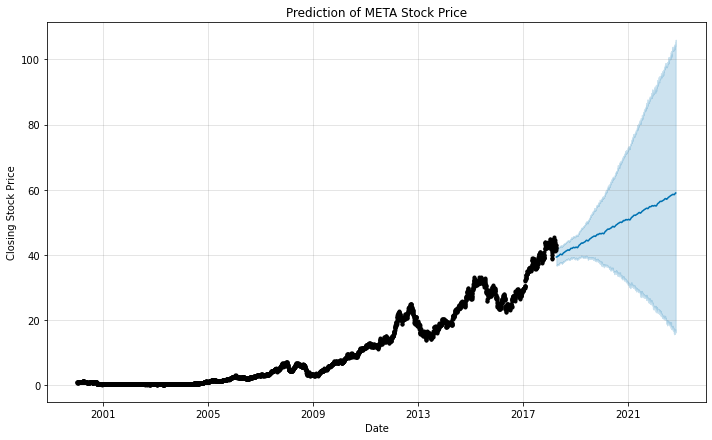

In [19]:
p_model.plot(forecast)
plt.title("Prediction of Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

In [20]:
# Define the true and predicted values for calculating the errors.

py_true = ph_test['y'][-1149:]
py_pred = forecast['yhat'].values

In [21]:
# Calculate the Error parameters

print("The mean squared error (MSE) = ", mean_squared_error(py_true, py_pred))
print("The mean absolute error (MAS) = ", mean_absolute_error(py_true, py_pred))
print("The mean squared log error (MSLE) = ", mean_squared_log_error(py_true, py_pred))

The mean squared error (MSE) =  4193.62480791237
The mean absolute error (MAS) =  50.74213633863697
The mean squared log error (MSLE) =  0.4975627748920549
